## Predictive Modeling: Using Regression models to predict price of used cars.
This project aims to show the process of creating Machine Learning models based on Simple, Multiple and Polynomial Regressions.
In this project, R2 is used to evaluate the performance of the models. Pearson Coeficient's P-Value of <= 0.05 rejects the null hypotesis.

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

In [18]:
def PrepData(pathfile,carmodelname,target): ##remove nulls in price
    df = pd.read_csv(pathfile)
    df = df[df['model_name'].isin([carmodelname])].reset_index(drop=True).drop(['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','duration_listed','engine_has_gas','engine_type','has_warranty','is_exchangeable','location_region','number_of_photos','body_type','up_counter','feature_0','manufacturer_name','model_name'],axis=1)
    TargetVar = df[target]
    df.drop(columns=[target],axis=1,inplace=True)
    df.insert(0,target,TargetVar)
    dfobject = df.select_dtypes(include='object')
    df = df.select_dtypes(exclude='object')
    return dfobject, df

def Dummies(df):
    return pd.concat([df, pd.get_dummies(df[list(df)])],axis=1).drop(df[list(df)],axis=1)

def ReadyData(dfnumeric,dfnonnumeric):
    return pd.merge(dfnumeric,Dummies(dfnonnumeric),left_index=True,right_index=True)

def BoxplotObjects(df,dftarget): ## Show counts on plot ##better show car colors
    fig, axs = plt.subplots(ncols=len(list(df)), figsize=(16,4),sharey=True)
    t = 0
    for c in list(df):
        sns.boxplot(x=df[c],y=dftarget[Y],data=df, ax=axs[t])
        t += 1
    return

#Pearson coefficient calculation
def CoefPearson(df):
    lcoef = []
    lp = []
    for col in list(df.columns):
        coef, p = stats.pearsonr(df[col],df[Y])
        lcoef.append(coef)
        lp.append(round(p,3))
    return pd.DataFrame(lcoef).merge(pd.DataFrame(lp),on=df.columns).rename(columns={'key_0':'IndependentVar','0_x':'PearsonCoef','0_y':'P-Value'}).drop([0]).reset_index(drop=True)

#Listing n independent variables with p <= 0.05
def NLargAbsCoef(df,n):
    df = CoefPearson(df)
    df = df[df['P-Value'] <= 0.05].reset_index(drop=True).loc[df['PearsonCoef'].abs().nlargest(n,keep='first').index]
    return list(df['IndependentVar'])

#Listing all indepedent variables with p <= 0.05
def AllCoef(df):
    df = CoefPearson(df)
    df = df[df['P-Value'] <= 0.05].reset_index(drop=True)
    return list(df['IndependentVar'])

#Simple Linear Regression Model and Plot
def SLRModelandPlot():
    x = cardf[[NLargAbsCoef(cardf,1)[0]]].values
    m = LinearRegression().fit(x,TargetCol)
    fig, axs = plt.subplots(ncols=2, figsize=(16,4))
    ax0 = sns.regplot(x=x,y=TargetCol,data=cardf,ax=axs[0])
    ax1 = sns.residplot(x=x,y=TargetCol,data=cardf,ax=axs[1])
    ax0.set_ylim(0,)
    ax0.set_xlim(x.min(),)
    print('Simple Linear Regression Model Equation:\n',m.intercept_,'+',float(m.coef_),'*',Y)
    return m,x

#Multiple Linear Regression Model and Plot
def MLRModelandPlot(): #adapt to get max num of var and better show model equation
    x = cardf[AllCoef(cardf)].values
    m = LinearRegression().fit(x,TargetCol)
    print("Intercept:",m.intercept_)
    print("Coefs:",list(m.coef_))
    plt.figure(figsize=(16,4))
    ax1 = sns.kdeplot(TargetCol, color="r", label="Actual Value")
    sns.kdeplot(m.predict(x), color="b", label="Predicted Values", ax=ax1)
    plt.title('Actual (red) vs Predicted (blue) Price')
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')
    plt.xlim(0,)
    plt.show()
    plt.close()
    return x,m

#Polynomial Regression Model and Plot
def PlotPR(degrees): #adapt to get best degree
    x = cardf[NLargAbsCoef(cardf,1)[0]].values
    m = np.poly1d(np.polyfit(x, TargetCol, degrees))
    x_new = np.linspace(x.min(),x.max())
    y_new = m(x_new)
    print('Polynomial Regression Model Equation:\n',m)
    plt.plot(x, TargetCol, '.', x_new, y_new, '-')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.show()
    plt.close()
    return x,m

In [ ]:
#Preparing car selector
#def car_selector():
#    df = pd.read_csv('../PredictiveModelingRegression/cars.csv')
#    dropdown_manufacturer = widgets.Dropdown(options = sorted(list(set(df['manufacturer_name']))))
#    output = widgets.Output()
#    
#    def output_by_manufacturer(manufacturer):
#        with output:
#            IPython.display.clear_output(wait=True)
#            output_data = df[df['manufacturer_name'] == manufacturer]
#            display(output_data)
#
#    def dropdown_state_eventhandler(change):
#            display(input_widgets)
#            output_by_manufacturer(change.new)
#              
#    dropdown_manufacturer.observe(dropdown_state_eventhandler, names='value')
#    input_widgets = widgets.HBox([dropdown_manufacturer])
#    display(input_widgets,output)
#
#car_selector()

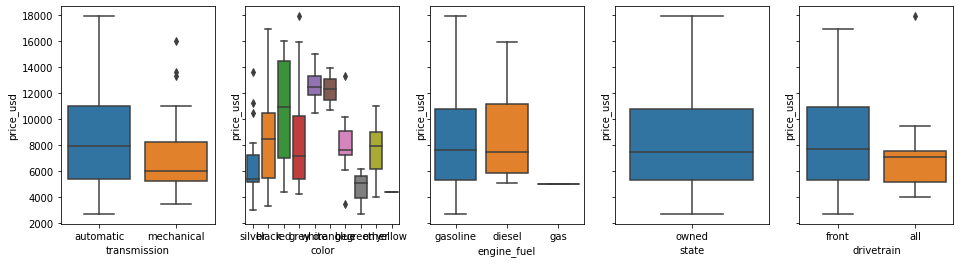

In [3]:
pf = '../PredictiveModelingRegression/cars.csv' #pathfile of the dataset
#list(set(pd.read_csv('../PredictiveModelingRegression/cars.csv')['model_name'])) <-- List of car models
carmodel = 'S60' # Car model to predict
Y = 'price_usd' # Y is the name of the column with dependent (target) variable
#Pipeline more
dfobj, dfnum = PrepData(pf,carmodel,Y)
BoxplotObjects(dfobj, dfnum)
cardf = ReadyData(dfnum, dfobj)
TargetCol = cardf[Y]

c:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Simple Linear Regression Model Equation:
 -1511547.6825293456 + 757.3514402610685 * price_usd


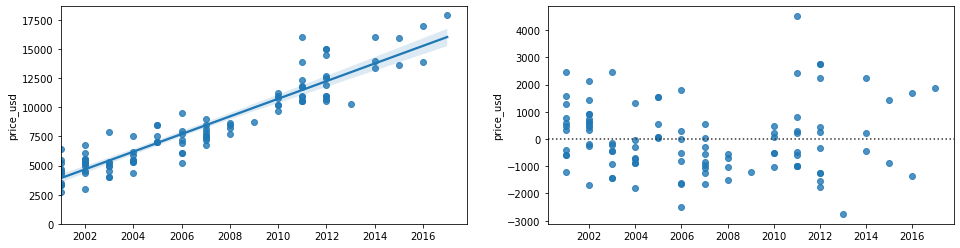

In [6]:
slrm,slrx = SLRModelandPlot()

c:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Intercept: -1518874.4320020992
Coefs: [0.0006195336715654841, 760.7400942321295, 193.87274608689202, -387.23329254722034, 380.58181633840627]


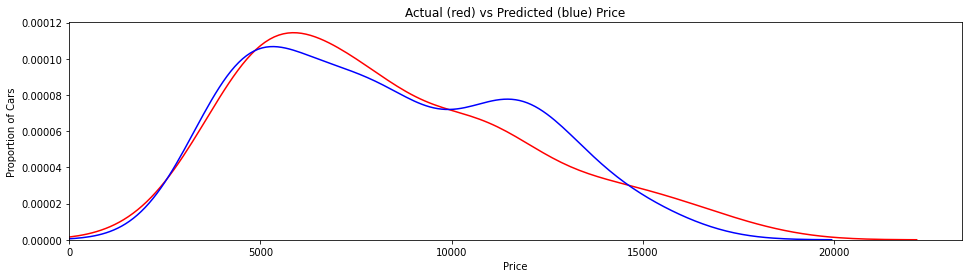

In [7]:
mlrx, mlrm = MLRModelandPlot()

Polynomial Regression Model Equation:
          4         3             2
-0.0576 x + 461.4 x - 1.386e+06 x + 1.851e+09 x - 9.266e+11


c:\Users\GFreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


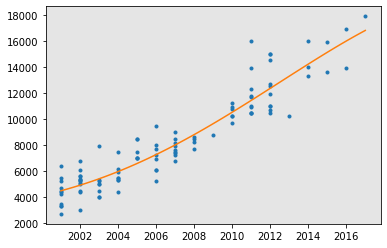

In [8]:
prx, prm = PlotPR(4)

In [9]:
#R2 calculation
def R2(realY,predictY):
    return r2_score(realY,predictY)

#Comparison of best model by R2 criteria
def ModelComparison():
    md = ['Simple Linear Regression','Multiple Linear Regression','Polynomial Regression']
    preds = [slrm.predict(slrx),mlrm.predict(mlrx),prm(prx)]
    bestr2 = 0
    for pred, q in zip(list(preds), md):
        r2 = R2(TargetCol,pred)
        print(q,'R2:',r2)
        if r2 > bestr2:
            bestr2 = r2
            bestq = q
    print('\nBest model by R2 is',bestq,'with R2 of',bestr2)

In [10]:
ModelComparison()

Simple Linear Regression R2: 0.8733164140771128
Multiple Linear Regression R2: 0.8758471465063888
Polynomial Regression R2: 0.8834310353359439

Best model by R2 is Polynomial Regression with R2 of 0.8834310353359439
